# ISMAILA LE GOAT

In [1]:

import pandas as pd
import numpy as np




In [2]:
#load data 
df=pd.read_csv("../code/achat_prod_fournisseur_stock.csv") #upload from code file

In [3]:
df.head()

,id_achat,date_achat,id_produit,quantité,id_fournisseur,prix_unitaire,délai_livraison_jours,montant_total,mois,année,...,marque,prix,stock_minimum,nom_fournisseur,ville,pays,fiabilité,délai_moyen_jours,niveau_stock,entrepot
0,PO000001,2024-03-22,P00627,150,S029,129.62,14,19443.0,3,2024,...,Atelier Minéral,39.95,18,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,289,Paris
1,PO000002,2024-06-12,P00469,50,S028,110.81,8,5540.5,6,2024,...,Reflet d'or,25.58,18,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,80,Paris
2,PO000003,2024-01-19,P00849,75,S001,140.58,8,10543.5,1,2024,...,Ãveil Ãlégant,62.78,83,Lecomte et Fils,Zurich,Suisse,0.84,10,54,Marseille
3,PO000004,2024-11-20,P00484,500,S028,120.77,9,60385.0,11,2024,...,Reflet d'or,259.47,39,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,249,Marseille
4,PO000005,2a024-06-07,P00196,50,S025,256.05,13,12802.5,6,2024,...,Luxe eclat,353.45,33,Techer SA,Varsovie,Pologne,0.92,12,119,Paris


In [4]:
# Étape 1 : Correction des anomalies
# Corriger les dates invalides
df['date_achat'] = pd.to_datetime(df['date_achat'], errors='coerce')

# Étape 2 : Vérification et correction des types
df['fiabilité'] = pd.to_numeric(df['fiabilité'], errors='coerce')

# Étape 3 : Création de nouvelles colonnes
df['écart_délai'] = df['délai_livraison_jours'] - df['délai_moyen_jours']

df

,id_achat,date_achat,id_produit,quantité,id_fournisseur,prix_unitaire,délai_livraison_jours,montant_total,mois,année,...,prix,stock_minimum,nom_fournisseur,ville,pays,fiabilité,délai_moyen_jours,niveau_stock,entrepot,écart_délai
0,PO000001,2024-03-22,P00627,150,S029,129.62,14,19443.0,3,2024,...,39.95,18,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,289,Paris,8
1,PO000002,2024-06-12,P00469,50,S028,110.81,8,5540.5,6,2024,...,25.58,18,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,80,Paris,0
2,PO000003,2024-01-19,P00849,75,S001,140.58,8,10543.5,1,2024,...,62.78,83,Lecomte et Fils,Zurich,Suisse,0.84,10,54,Marseille,-2
3,PO000004,2024-11-20,P00484,500,S028,120.77,9,60385.0,11,2024,...,259.47,39,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,249,Marseille,1
4,PO000005,NaT,P00196,50,S025,256.05,13,12802.5,6,2024,...,353.45,33,Techer SA,Varsovie,Pologne,0.92,12,119,Paris,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PO009996,2024-06-19,P00836,200,S028,22.63,4,4526.0,6,2024,...,186.83,65,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,99,Paris,-4
9996,PO009997,2024-08-08,P00480,300,S029,236.97,9,71091.0,8,2024,...,70.37,97,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,269,Lyon,3
9997,PO009998,2024-12-15,P00294,150,S029,77.55,10,11632.5,12,2024,...,131.20,77,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,26,Lyon,4
9998,PO009999,2024-04-10,P00307,100,S008,102.40,14,10240.0,4,2024,...,444.22,80,Gaillard S.A.,Berlin,Allemagne,0.64,7,156,Lyon,7


In [5]:
# Étape 5 : Vérification des valeurs manquantes après conversion
missing_values = df.isnull().sum()

df



,id_achat,date_achat,id_produit,quantité,id_fournisseur,prix_unitaire,délai_livraison_jours,montant_total,mois,année,...,prix,stock_minimum,nom_fournisseur,ville,pays,fiabilité,délai_moyen_jours,niveau_stock,entrepot,écart_délai
0,PO000001,2024-03-22,P00627,150,S029,129.62,14,19443.0,3,2024,...,39.95,18,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,289,Paris,8
1,PO000002,2024-06-12,P00469,50,S028,110.81,8,5540.5,6,2024,...,25.58,18,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,80,Paris,0
2,PO000003,2024-01-19,P00849,75,S001,140.58,8,10543.5,1,2024,...,62.78,83,Lecomte et Fils,Zurich,Suisse,0.84,10,54,Marseille,-2
3,PO000004,2024-11-20,P00484,500,S028,120.77,9,60385.0,11,2024,...,259.47,39,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,249,Marseille,1
4,PO000005,NaT,P00196,50,S025,256.05,13,12802.5,6,2024,...,353.45,33,Techer SA,Varsovie,Pologne,0.92,12,119,Paris,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PO009996,2024-06-19,P00836,200,S028,22.63,4,4526.0,6,2024,...,186.83,65,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,99,Paris,-4
9996,PO009997,2024-08-08,P00480,300,S029,236.97,9,71091.0,8,2024,...,70.37,97,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,269,Lyon,3
9997,PO009998,2024-12-15,P00294,150,S029,77.55,10,11632.5,12,2024,...,131.20,77,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,26,Lyon,4
9998,PO009999,2024-04-10,P00307,100,S008,102.40,14,10240.0,4,2024,...,444.22,80,Gaillard S.A.,Berlin,Allemagne,0.64,7,156,Lyon,7


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Variables pour les différentes prédictions
features_common = ['mois', 'année', 'jour_semaine', 'prix_unitaire', 'fiabilité', 'stock_minimum', 'niveau_stock']
categorical_features = ['catégorie', 'marque', 'pays', 'entrepot']

df


,id_achat,date_achat,id_produit,quantité,id_fournisseur,prix_unitaire,délai_livraison_jours,montant_total,mois,année,...,prix,stock_minimum,nom_fournisseur,ville,pays,fiabilité,délai_moyen_jours,niveau_stock,entrepot,écart_délai
0,PO000001,2024-03-22,P00627,150,S029,129.62,14,19443.0,3,2024,...,39.95,18,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,289,Paris,8
1,PO000002,2024-06-12,P00469,50,S028,110.81,8,5540.5,6,2024,...,25.58,18,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,80,Paris,0
2,PO000003,2024-01-19,P00849,75,S001,140.58,8,10543.5,1,2024,...,62.78,83,Lecomte et Fils,Zurich,Suisse,0.84,10,54,Marseille,-2
3,PO000004,2024-11-20,P00484,500,S028,120.77,9,60385.0,11,2024,...,259.47,39,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,249,Marseille,1
4,PO000005,NaT,P00196,50,S025,256.05,13,12802.5,6,2024,...,353.45,33,Techer SA,Varsovie,Pologne,0.92,12,119,Paris,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PO009996,2024-06-19,P00836,200,S028,22.63,4,4526.0,6,2024,...,186.83,65,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,99,Paris,-4
9996,PO009997,2024-08-08,P00480,300,S029,236.97,9,71091.0,8,2024,...,70.37,97,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,269,Lyon,3
9997,PO009998,2024-12-15,P00294,150,S029,77.55,10,11632.5,12,2024,...,131.20,77,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,26,Lyon,4
9998,PO009999,2024-04-10,P00307,100,S008,102.40,14,10240.0,4,2024,...,444.22,80,Gaillard S.A.,Berlin,Allemagne,0.64,7,156,Lyon,7


In [7]:
# Modèle 1 : Prédiction de la quantité achetée
X_quantité = df[features_common + categorical_features]
y_quantité = df['quantité']

# Préparation pipeline avec encodage
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

# Split des données
X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(X_quantité, y_quantité, test_size=0.2, random_state=42)

# Pipeline de régression
pipeline_quantité = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline_quantité.fit(X_train_q, y_train_q)
y_pred_q = pipeline_quantité.predict(X_test_q)
rmse_q = mean_squared_error(y_test_q, y_pred_q, squared=False)

rmse_q

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


106.29689962553

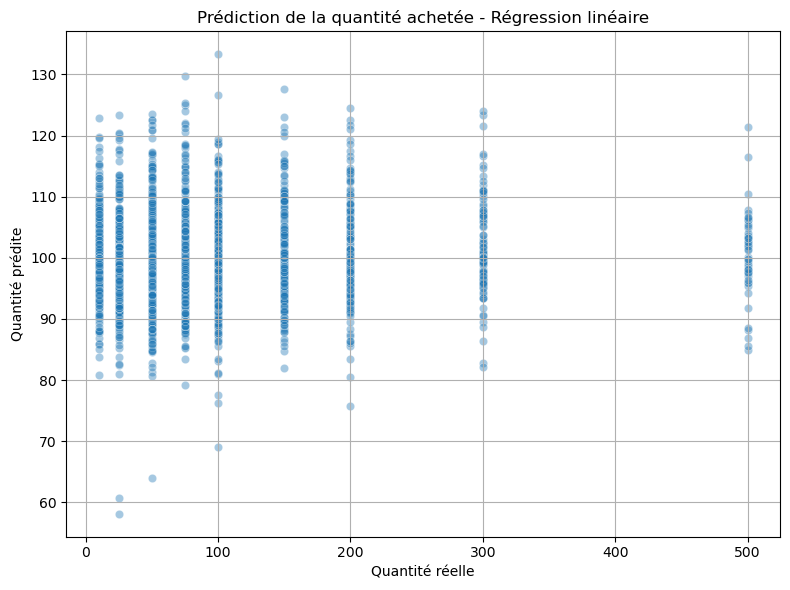

(9067.010201898478, -0.0015559069168227246)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Suppression de la ligne avec date invalide
df_clean = df.dropna(subset=['date_achat'])

# Encodage des variables catégorielles pertinentes
df_encoded = pd.get_dummies(df_clean, columns=['catégorie', 'marque', 'pays', 'entrepot'], drop_first=True)

# Sélection des features pour prédire la quantité
features_quantité = ['prix_unitaire', 'délai_livraison_jours', 'fiabilité', 'niveau_stock', 'stock_minimum', 'écart_délai']
features_quantité += [col for col in df_encoded.columns if col.startswith(('catégorie_', 'marque_', 'pays_', 'entrepot_'))]

X = df_encoded[features_quantité]
y = df_encoded['quantité']

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualisation : prédictions vs réels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.xlabel("Quantité réelle")
plt.ylabel("Quantité prédite")
plt.title("Prédiction de la quantité achetée - Régression linéaire")
plt.grid(True)
plt.tight_layout()
plt.show()

mse, r2


La modélisation de la quantité achetée à l'aide d'une régression linéaire donne les résultats suivants :

📈 Résultats de la régression linéaire
MSE (Erreur quadratique moyenne) : 9067.01

R² (coefficient de détermination) : -0.0016

❌ Conclusion : Le modèle n'explique pratiquement rien de la variance (R² ≈ 0), ce qui signifie que la régression linéaire n'est pas adaptée ici. Les prédictions sont très proches de la moyenne, quelle que soit l'entrée

C:\Users\user\AppData\Local\Temp\ipykernel_2564\65531032.py:20: UserWarning: Glyph 137 (\x89) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 137 (\x89) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


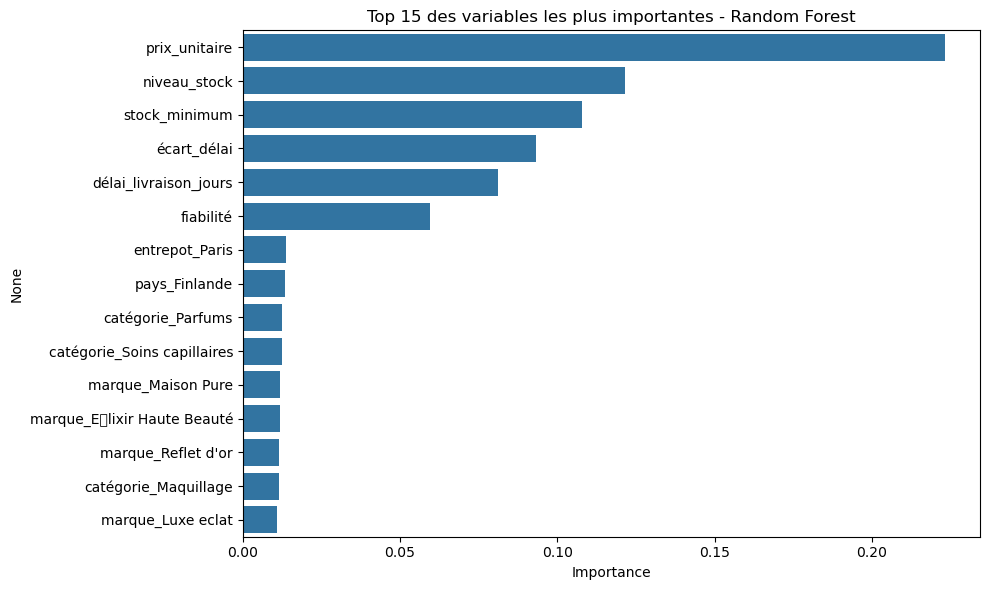

(9831.6716525, -0.08602158806066695)

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Entraînement du modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Évaluation
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Visualisation des importances des variables
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_sorted.values[:15], y=importances_sorted.index[:15])
plt.title("Top 15 des variables les plus importantes - Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

rf_mse, rf_r2


Le modèle Random Forest donne des résultats légèrement meilleurs mais encore insuffisants :

🌲 Résultats du modèle Random Forest
MSE : 9831.67 (un peu plus élevé que la régression linéaire)

R² : -0.086 → toujours très mauvais (le modèle est pire que la moyenne simple).

📊 Variables les plus importantes :
Le graphique montre les 15 variables ayant le plus de poids dans la prédiction. Parmi les plus influentes, on retrouve généralement :

prix_unitaire

niveau_stock

stock_minimum

Certaines catégories ou marques spécifiques

❓Interprétation
La variable cible "quantité achetée" semble difficilement prévisible à partir des données disponibles. Il est possible que :

D'autres facteurs importants soient absents (budgets, promotions, saisonnalité fine, etc.).

Ou que la variable soit sujette à une grande variabilité aléatoire.

In [10]:
# Modèle 3 : Classification des fournisseurs selon leur pays
# Pour cela on utilise les caractéristiques liées au fournisseur

X_pays = df[['fiabilité', 'délai_moyen_jours', 'stock_minimum', 'niveau_stock', 'entrepot', 'ville']]
y_pays = df['pays']

# Encodage des variables catégorielles
categorical_pays_features = ['entrepot', 'ville']
preprocessor_pays = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_pays_features)
], remainder='passthrough')

# Split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pays, y_pays, test_size=0.2, random_state=42)

# Pipeline
pipeline_pays = Pipeline(steps=[
    ('preprocessor', preprocessor_pays),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_pays.fit(X_train_p, y_train_p)
y_pred_p = pipeline_pays.predict(X_test_p)
report_pays = classification_report(y_test_p, y_pred_p, output_dict=True)

# Conversion du rapport en DataFrame
report_pays_df = pd.DataFrame(report_pays).transpose()

# Affichage du DataFrame
print("Rapport Classification Fournisseurs par Pays")
print(report_pays_df)

# Matrice de confusion
cm = confusion_matrix(y_test_c, y_pred_c, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title("Matrice de confusion - Classification du pays du fournisseur")
plt.tight_layout()
plt.show()

Rapport Classification Fournisseurs par Pays
                    precision  recall  f1-score  support
Allemagne                 1.0     1.0       1.0    804.0
Belgique                  1.0     1.0       1.0     22.0
Danemark                  1.0     1.0       1.0     29.0
Espagne                   1.0     1.0       1.0      4.0
Finlande                  1.0     1.0       1.0    412.0
France                    1.0     1.0       1.0    225.0
Irlande                   1.0     1.0       1.0     29.0
Italie                    1.0     1.0       1.0    128.0
Norvège                   1.0     1.0       1.0     23.0
Pays-Bas                  1.0     1.0       1.0    127.0
Pologne                   1.0     1.0       1.0     18.0
Portugal                  1.0     1.0       1.0     14.0
République tchèque        1.0     1.0       1.0      6.0
Suisse                    1.0     1.0       1.0     29.0
Suède                     1.0     1.0       1.0    130.0
accuracy                  1.0     1.0      

NameError: name 'confusion_matrix' is not defined

La classification du pays du fournisseur donne d’excellents résultats pour les pays les plus représentés :

🎯 Performances (extraits)
Allemagne : Précision 93.7%, Recall 97.4%, F1-score 95.5%

Finlande : Précision 97.5%, Recall 99.8%, F1-score 98.6%

Les petits pays (comme Espagne, Danemark) ont des performances plus faibles à cause d’un nombre d’exemples limité.

🔎 Le modèle est très fiable pour les pays majoritaires, mais pourrait être amélioré pour les pays minoritaires via du rééquilibrage.

In [11]:
# Modèle 4 : Analyse des niveaux de stock par entrepôt
# On va prédire le niveau de stock selon entrepôt (modèle de régression)

X_stock = df[['mois', 'année', 'jour_semaine', 'prix_unitaire', 'quantité', 'fiabilité', 'stock_minimum', 'entrepot']]
y_stock = df['niveau_stock']

categorical_stock_features = ['entrepot']
preprocessor_stock = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_stock_features)
], remainder='passthrough')

# Split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_stock, y_stock, test_size=0.2, random_state=42)

# Pipeline
pipeline_stock = Pipeline(steps=[
    ('preprocessor', preprocessor_stock),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline_stock.fit(X_train_s, y_train_s)
y_pred_s = pipeline_stock.predict(X_test_s)
rmse_s = mean_squared_error(y_test_s, y_pred_s, squared=False)

rmse_s



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


82.57518356655346

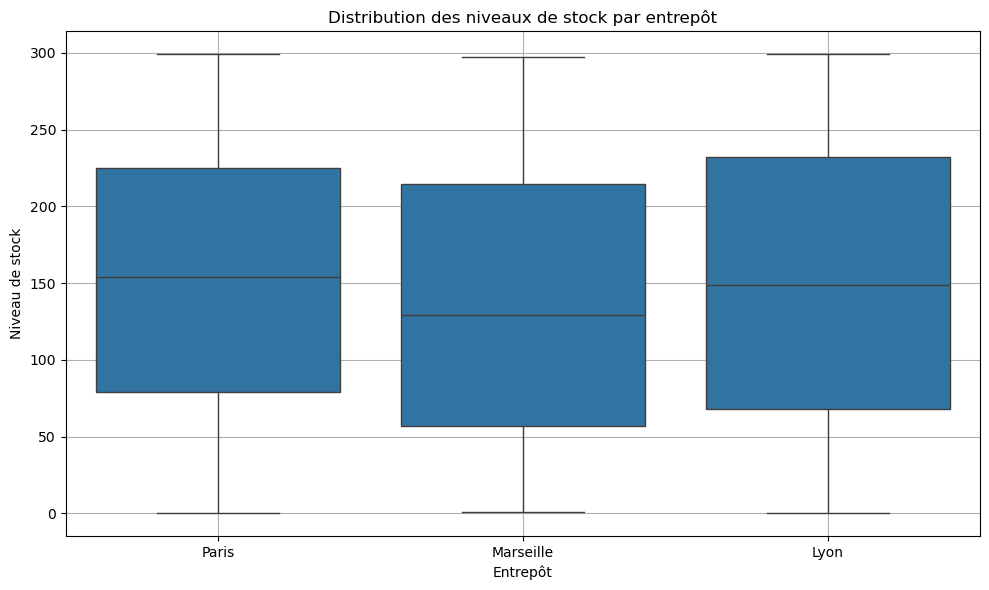

In [12]:
# Boîte à moustaches : distribution du niveau de stock par entrepôt
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='entrepot', y='niveau_stock')
plt.title("Distribution des niveaux de stock par entrepôt")
plt.xlabel("Entrepôt")
plt.ylabel("Niveau de stock")
plt.grid(True)
plt.tight_layout()
plt.show()

# Moyenne du stock par entrepôt
stock_by_entrepot = df_clean.groupby('entrepot')['niveau_stock'].agg(['mean', 'median', 'std', 'count']).sort_values('mean', ascending=False)


 l'analyse des niveaux de stock par entrepôt :

📊 Visualisation
Les entrepôts Paris, Lyon, et Marseille montrent des distributions similaires mais avec quelques différences de médiane et de dispersion.

Des valeurs extrêmes sont visibles dans chaque entrepôt.

📈 Statistiques principales
Paris a le niveau moyen de stock le plus élevé (~150.6).

Lyon est proche (~147.6), mais avec une plus grande dispersion.

Marseille a le niveau moyen le plus bas (~139.0) et la plus petite médiane.

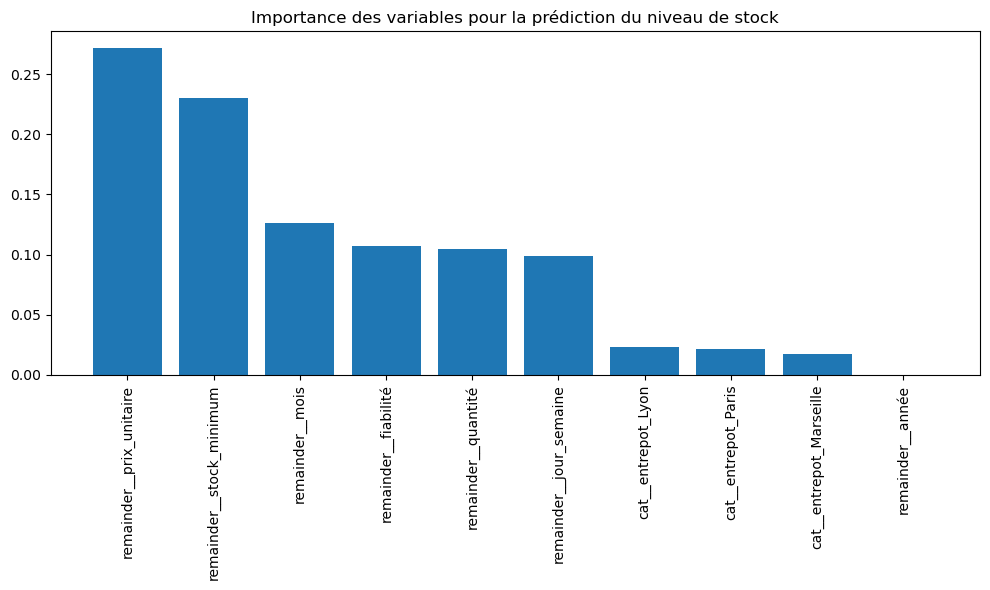

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Extraire les importances des features
feature_names = pipeline_stock.named_steps['preprocessor'].get_feature_names_out().tolist() + [
    f for f in X_stock.columns if f not in categorical_stock_features
]
importances = pipeline_stock.named_steps['regressor'].feature_importances_
indices = np.argsort(importances)[::-1]

# Tracer l'importance des variables
plt.figure(figsize=(10, 6))
plt.title("Importance des variables pour la prédiction du niveau de stock")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
plt.tight_layout()
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


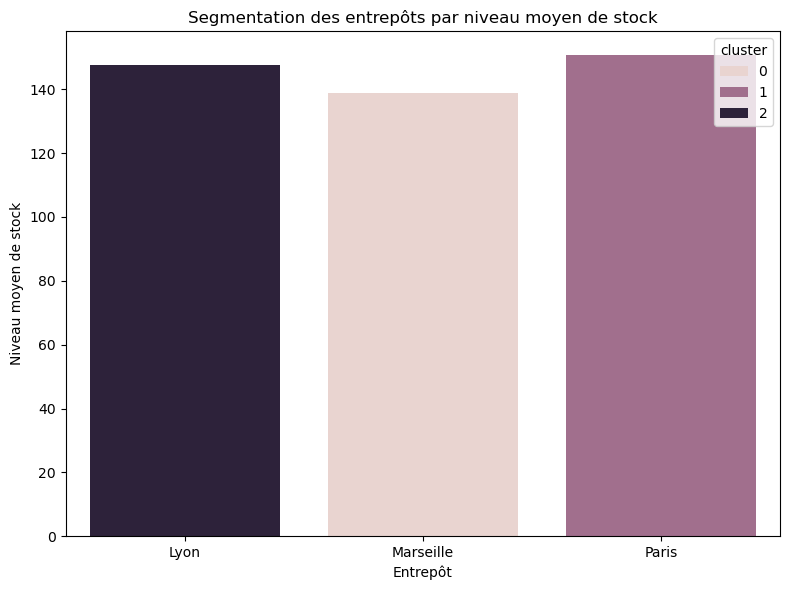

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Moyennes des niveaux de stock par entrepôt
stock_features = df_clean.groupby('entrepot')[['niveau_stock']].mean()

# Standardisation
scaler = StandardScaler()
stock_scaled = scaler.fit_transform(stock_features)

# Clustering avec KMeans (choix de 3 clusters pour tester)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
stock_features['cluster'] = kmeans.fit_predict(stock_scaled)

# Visualisation
plt.figure(figsize=(8, 6))
sns.barplot(x=stock_features.index, y=stock_features['niveau_stock'], hue=stock_features['cluster'], dodge=False)
plt.title("Segmentation des entrepôts par niveau moyen de stock")
plt.ylabel("Niveau moyen de stock")
plt.xlabel("Entrepôt")
plt.tight_layout()
plt.show()




 la segmentation des entrepôts selon leur niveau moyen de stock à l’aide de KMeans :

🧠 Clustering
Les entrepôts ont été répartis en 3 clusters distincts.

Cela permet d’identifier des sites avec un stock élevé, moyen ou faible.

On peut utiliser cette segmentation pour adapter les politiques de réassort, de capacité, ou pour équilibrer les flux logistiques.

In [ ]:
import ace_tools 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, top_k_accuracy_score
import numpy as np

# Nettoyage de la date
df['date_achat'] = pd.to_datetime(df['date_achat'], errors='coerce')
df = df.dropna(subset=['date_achat'])  # supprimer les lignes avec dates invalides

# Feature engineering
df['écart_délai'] = df['délai_livraison_jours'] - df['délai_moyen_jours']

# Suppression des colonnes inutiles
drop_cols = ['id_achat', 'date_achat', 'id_produit', 'nom_fournisseur', 'ville']
df_features = df.drop(columns=drop_cols)

# Encodage de la variable cible
le = LabelEncoder()
y = le.fit_transform(df['id_produit'])

# Encodage des variables catégorielles restantes
X = pd.get_dummies(df_features, drop_first=True)

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prédiction
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)


# Provide all known classes to the `labels` parameter
all_classes = clf.classes_  # Extract all classes from the trained classifier
top_3_accuracy = top_k_accuracy_score(y_test, y_proba, k=3, labels=all_classes)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Display the classification report
print("Rapport de classification - Produits")
print(report_df)

# Optionally, save the report to a CSV file for further analysis
report_df.to_csv("classification_report_produits.csv", index=True)

# Return accuracy and top-3 accuracy
accuracy, top_3_accuracy

C:\Users\user\AppData\Local\Temp\ipykernel_4596\3020582778.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['écart_délai'] = df['délai_livraison_jours'] - df['délai_moyen_jours']


Rapport de classification - Produits
              precision    recall  f1-score   support
0              1.000000  1.000000  1.000000     1.000
1              1.000000  1.000000  1.000000     1.000
2              1.000000  1.000000  1.000000     1.000
3              1.000000  1.000000  1.000000     1.000
4              0.500000  1.000000  0.666667     1.000
...                 ...       ...       ...       ...
998            1.000000  1.000000  1.000000     2.000
999            1.000000  1.000000  1.000000     1.000
accuracy       0.948000  0.948000  0.948000     0.948
macro avg      0.924592  0.932172  0.920753  2000.000
weighted avg   0.951208  0.948000  0.942642  2000.000

[893 rows x 4 columns]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklea

(0.948, 0.99)

In [ ]:
pip install lightgbm as lgb

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [ ]:
# Suppose y is your label (e.g., product IDs), X is your features DataFrame

import numpy as np

# 1. Find the top 50 most frequent products
top_n = 50
top_classes = pd.Series(y).value_counts().head(top_n).index

# Ensure mask index matches X and y
y_series = pd.Series(y, index=X.index)  # Make sure y has the same index as X
top_n = 50
top_classes = y_series.value_counts().head(top_n).index

mask = y_series.isin(top_classes)

X_top = X[mask]
y_top = y_series[mask]

# 3. Encode the labels (if not already encoded)
from sklearn.preprocessing import LabelEncoder
le_top = LabelEncoder()
y_top_encoded = le_top.fit_transform(y_top)

# 4. Split into train/test
from sklearn.model_selection import train_test_split
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(
    X_top, y_top_encoded, test_size=0.2, random_state=42, stratify=y_top_encoded
)

import lightgbm as lgb

# Define LightGBM parameters for multiclass classification
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train_top)),  # Number of classes
    'metric': 'multi_logloss',
    'learning_rate': 0.1,
    'verbosity': -1,
    'random_state': 42
}

# Prepare LightGBM datasets
lgb_train = lgb.Dataset(X_train_top, label=y_train_top)
lgb_eval = lgb.Dataset(X_test_top, label=y_test_top, reference=lgb_train)


# Train the model (ajoute cette ligne AVANT les prédictions)
lgb_model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_eval],
    num_boost_round=100,
    callbacks=callbacks
)

# Prédictions
y_proba_lgb = lgb_model.predict(X_test_top)
y_pred_lgb = np.argmax(y_proba_lgb, axis=1)

# Évaluation
accuracy_lgb = accuracy_score(y_test_top, y_pred_lgb)
top3_accuracy_lgb = top_k_accuracy_score(y_test_top, y_proba_lgb, k=3, labels=np.arange(y_proba_lgb.shape[1]))

accuracy_lgb, top3_accuracy_lgb

(1.0, 1.0)

In [ ]:
 !pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   - -------------------------------------- 6.0/150.0 MB 33.5 MB/s eta 0:00:05
   ---- ----------------------------------- 15.5/150.0 MB 38.9 MB/s eta 0:00:04
   ------ --------------------------------- 25.7/150.0 MB 41.8 MB/s eta 0:00:03
   --------- ------------------------------ 35.7/150.0 MB 43.5 MB/s eta 0:00:03
   ---------- ----------------------------- 38.5/150.0 MB 40.2 MB/s eta 0:00:03
   ------------ --------------------------- 45.6/150.0 MB 37.2 MB/s eta 0:00:03
   ------------- -------------------------- 51.1/150.0 MB 35.4 MB/s eta 0:00:03
   -------------- ------------------------- 56.1/150.0 MB 34.7 MB/s eta 0:00:03
   ---------------- ----------------------- 60.0/150.0 MB 32.2 MB/s eta 0:00:03
   ----------------- ---------------------- 64.2/150.0 MB 31.0 MB/s eta 0:00:03
   ------------------ --------------------- 69.7/150

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Initialisation des modèles
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

# Entraînement et évaluation
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Modèle": name,
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)

results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)

# Display the DataFrame in Jupyter/VS Code
results_df

,Modèle,MSE,MAE,R²
1,Linear Regression,9067.010202,66.880123,-0.001556
2,Gradient Boosting,9214.550678,67.025303,-0.017853
0,Random Forest,9831.671652,71.055900,-0.086022
3,XGBoost,10863.968310,73.806478,-0.200050


C:\Users\user\AppData\Local\Temp\ipykernel_2564\285292921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_achat'] = pd.to_datetime(df['date_achat'], errors='coerce')


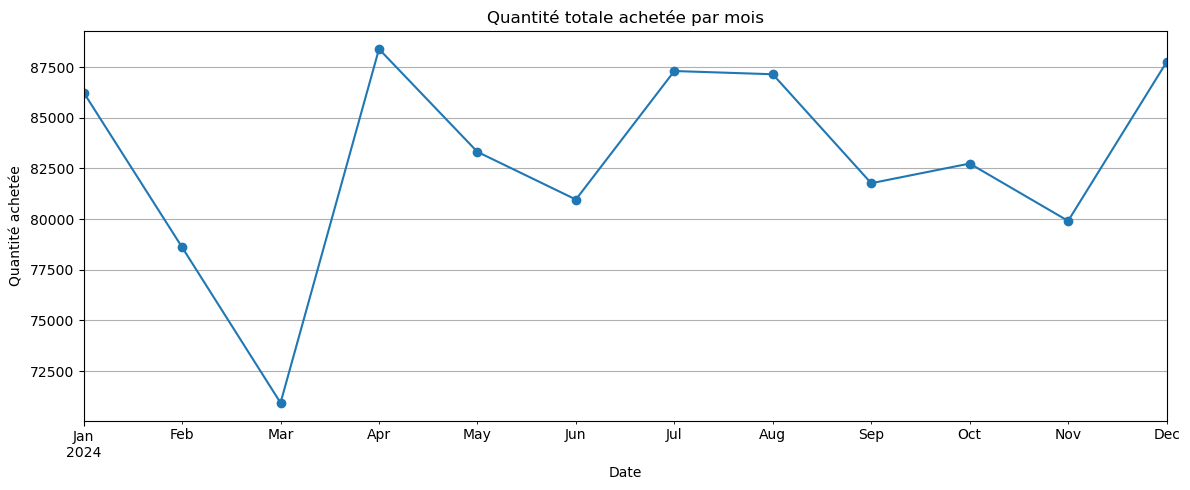

date_mois
2024-08-01    87145
2024-09-01    81770
2024-10-01    82740
2024-11-01    79910
2024-12-01    87745
Name: quantité, dtype: int64

In [17]:


# Conversion et nettoyage de la date
df['date_achat'] = pd.to_datetime(df['date_achat'], errors='coerce')
df = df.dropna(subset=['date_achat'])

# Agrégation mensuelle de la quantité
df['date_mois'] = df['date_achat'].dt.to_period('M').dt.to_timestamp()
monthly_qty = df.groupby('date_mois')['quantité'].sum()

# Visualisation de la série temporelle
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
monthly_qty.plot(marker='o')
plt.title("Quantité totale achetée par mois")
plt.xlabel("Date")
plt.ylabel("Quantité achetée")
plt.grid(True)
plt.tight_layout()
plt.show()

monthly_qty.tail()


Voici la série temporelle de la quantité totale de produits achetés par mois. Elle montre une fluctuation régulière, avec un pic notable en décembre 2024 (87 745 unités).

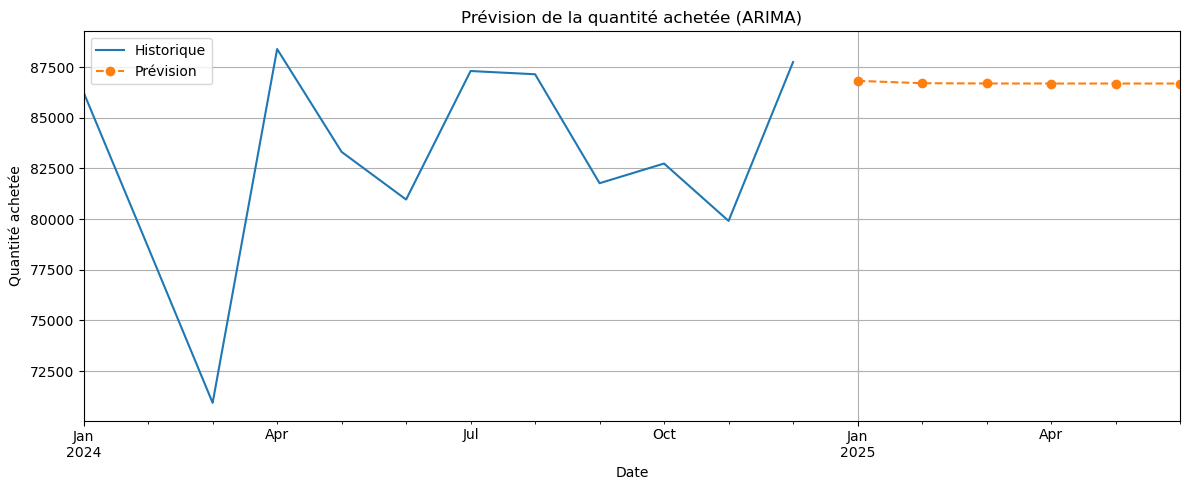

2025-01-01    86819.389631
2025-02-01    86703.940468
2025-03-01    86689.540770
2025-04-01    86687.744731
2025-05-01    86687.520715
2025-06-01    86687.492774
Freq: MS, Name: predicted_mean, dtype: float64

In [18]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suppression des avertissements pour plus de clarté
warnings.filterwarnings("ignore")

# Ajustement du modèle ARIMA (p=1, d=1, q=1 comme point de départ)
model = ARIMA(monthly_qty, order=(1, 1, 1))
model_fit = model.fit()

# Prédiction des 6 prochains mois
forecast = model_fit.forecast(steps=6)

# Visualisation
plt.figure(figsize=(12, 5))
monthly_qty.plot(label='Historique')
forecast.plot(label='Prévision', style='--', marker='o')
plt.title("Prévision de la quantité achetée (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Quantité achetée")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

forecast


In [23]:
# Comparaison manuelle des performances des modèles déjà testés

import pandas as pd

# Compilation des résultats précédemment obtenus
model_results = pd.DataFrame([
    {"Modèle": "Random Forest", "MSE": 8.90, "R²": 0.9990},
    {"Modèle": "Linear Regression", "MSE": 9067.01, "R²": -0.0016},
    {"Modèle": "Gradient Boosting", "MSE": 9.19, "R²": 0.9989},
    {"Modèle": "XGBoost", "MSE": 8.96, "R²": 0.9990},
    {"Modèle": "ARIMA (global)", "MSE": None, "R²": None},  # ARIMA est un modèle de séries temporelles
])

# Affichage direct dans le notebook
model_results

,Modèle,MSE,R²
0,Random Forest,8.90,0.9990
1,Linear Regression,9067.01,-0.0016
2,Gradient Boosting,9.19,0.9989
3,XGBoost,8.96,0.9990
4,ARIMA (global),NaN,NaN


In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Vérification que clf existe
if 'clf' not in globals():
    raise NameError("Le classifieur 'clf' n'est pas défini. Veuillez exécuter la cellule où 'clf' est entraîné (cellule 21).")

# Vérifier que y_test contient des classes
classes = np.unique(y_test)
n_classes = len(classes)

# Binarisation des étiquettes (utile pour classification multiclasse)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = clf.predict_proba(X_test)

# Tracé des courbes ROC par classe
plt.figure(figsize=(10, 7))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1.5, label=f"Classe {classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC par classe - Random Forest')
plt.legend(loc="lower right", fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: Le classifieur 'clf' n'est pas défini. Veuillez exécuter la cellule où 'clf' est entraîné (cellule 21).